In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


drive.mount('/content/drive')

## Carregando base de dados
PATH = '/content/drive/MyDrive/winequalityN.csv'
df = pd.read_csv(PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exercicio 1

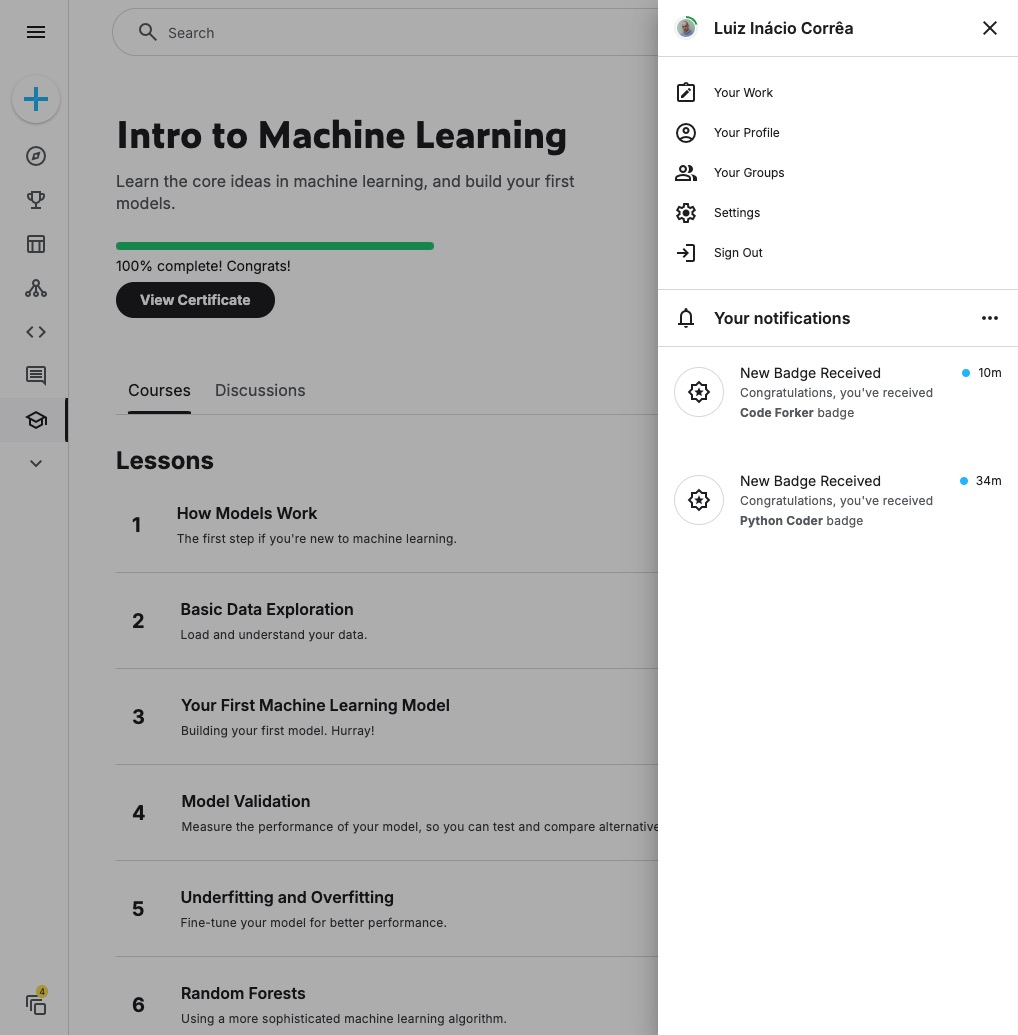

## Exercício 2

In [55]:
df_white = df[df["type"] == "white"].drop(columns=["type"])
df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)
df_white.fillna(df_white.mean(), inplace=True)

df_white = df_white.drop(columns=['quality'])
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


## Exercício 3

As variáveis são:

* fixed acidity - Variável contínua
* volatile acidity - Variável contínua
* citric acid - Variável contínua
* residual sugar - Variável contínua
* chlorides - Variável contínua
* free sulfur dioxide - Variável contínua
* total sulfur dioxide - Variável contínua
* density - Variável contínua
* pH - Variável contínua
* sulphates - Variável contínua
* alcohol - Variável contínua
* opinion - Variável categorica

In [56]:
# Média e desvio padrão das variáveis numéricas
means = df_white.mean()
std_devs = df_white.std()

print("Médias das variáveis:")
print(means)
print("\nDesvios padrão das variáveis:")
print(std_devs)



Médias das variáveis:
fixed acidity             6.855532
volatile acidity          0.278252
citric acid               0.334250
residual sugar            6.393250
chlorides                 0.045778
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188203
sulphates                 0.489835
alcohol                  10.514267
opinion                   0.665169
dtype: float64

Desvios padrão das variáveis:
fixed acidity            0.843118
volatile acidity         0.100739
citric acid              0.120960
residual sugar           5.071239
chlorides                0.021845
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.150906
sulphates                0.114123
alcohol                  1.230621
opinion                  0.471979
dtype: float64


## Exercicio 4

### Descreva as etapas necessárias para criar um modelo de classificação eficiente.

1. Coletar e carregar os dados.
2. Realizar pré-processamento e limpeza dos dados.
3. Normalizar os dados (se necessário).
4. Dividir os dados em conjuntos de treino e teste.
5. Escolher um modelo apropriado para o problema.
6. Usar validação cruzada para avaliar o desempenho do modelo.
7. Ajustar hiperparâmetros para otimização.
8. Avaliar as métricas de desempenho do modelo.

In [57]:
X = df_white.drop(columns=['opinion'])
y = df_white['opinion']

scaler = StandardScaler()
X_scaled =  scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

models = {
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

results = {}

for model_name, model in models.items():
    model_scores = {metric: cross_val_score(model, X_scaled, y, cv=kfold, scoring=scoring[metric]) for metric in scoring}
    results[model_name] = {metric: (scores.mean(), scores.std()) for metric, scores in model_scores.items()}


results_df = pd.DataFrame(results).T
print(results_df)

                                                      accuracy  \
Regressão Logística  (0.749486248487125, 0.016582677984275873)   
Árvore de Decisão    (0.7941993239013396, 0.02467969031028809)   
SVM                   (0.75275280664413, 0.013464548593782833)   

                                                      precision  \
Regressão Logística  (0.7751708928878693, 0.015400836893312578)   
Árvore de Decisão    (0.8481332980328885, 0.016049873000557824)   
SVM                  (0.7732151886117556, 0.011238070645607681)   

                                                         recall  \
Regressão Logística  (0.8787531854648419, 0.018260690496074008)   
Árvore de Decisão    (0.8413062765455404, 0.030004486200053346)   
SVM                  (0.8894941009910335, 0.020946024384855714)   

                                                             f1  
Regressão Logística  (0.8235299372642085, 0.011219610770682916)  
Árvore de Decisão     (0.8444869436285766, 0.02009183833902285)  

## Exercicio 5

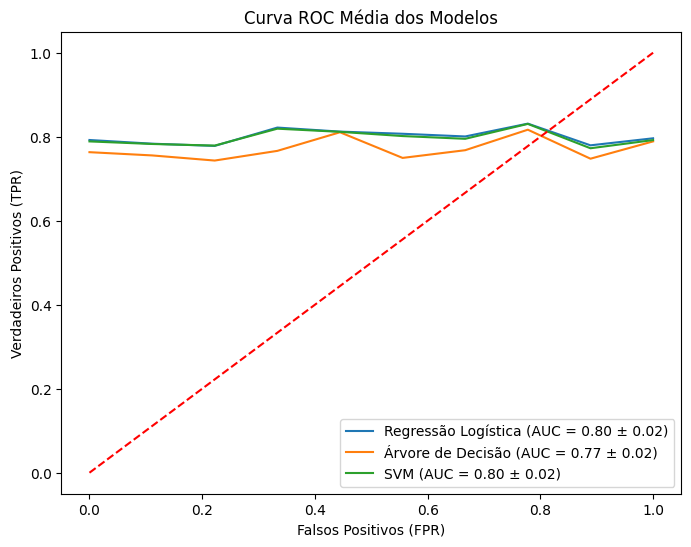

In [60]:
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    probas = cross_val_score(model, X_scaled, y, cv=kfold, scoring="roc_auc")
    mean_auc = probas.mean()
    std_auc = probas.std()
    plt.plot(np.linspace(0, 1, len(probas)), probas, label=f'{model_name} (AUC = {mean_auc:.2f} ± {std_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("Falsos Positivos (FPR)")
plt.ylabel("Verdadeiros Positivos (TPR)")
plt.title("Curva ROC Média dos Modelos")
plt.legend(loc="lower right")
plt.show()

#### Comparação dos Modelos

1. Árvore de Decisão apresentou a maior acurácia (79,4%), além de uma boa precisão (84,8%) e um equilíbrio entre recall e F1-score.
2.SVM teve um desempenho competitivo, com uma AUC alta e um recall superior (88,9%), o que indica que ele é um bom modelo para minimizar falsos negativos.
3.Regressão Logística teve um desempenho inferior aos outros dois modelos, com uma acurácia menor (74,9%) e uma curva ROC mais próxima da diagonal.

#### Escolha do Melhor Modelo

Analisando as métricas e a curva ROC, o modelo mais indicado para uma eventual operação é a Árvore de Decisão. Isso se deve aos seguintes fatores:
* Melhor acurácia geral entre os modelos.
* Alta precisão, reduzindo falsos positivos.
* Boa AUC-ROC, garantindo boa separabilidade entre as classes.
* Modelo mais interpretable e rápido, o que facilita sua implementação em produção.

O SVM, apesar de ter um recall ligeiramente melhor, pode ser mais custoso computacionalmente, além de ser menos interpretável que a Árvore de Decisão. Já a Regressão Logística não teve um desempenho tão bom quanto os outros dois modelos.

#### Conclusão

Portanto, a Árvore de Decisão é o modelo recomendado para operação, pois equilibra bem todas as métricas e possui um bom desempenho geral.

In [59]:
# Inferência nos vinhos tintos
df_red = df[df["type"] == "red"].drop(columns=["type"])
df_red['opinion'] = df_red['quality'].apply(lambda x: 0 if x <= 5 else 1)
df_red = df_red.drop(columns=['quality'])
df_red.fillna(df_red.mean(), inplace=True)

X_red = df_red.drop(columns=['opinion'])
y_red = df_red['opinion']
X_red_scaled = scaler.transform(X_red)

# Melhor modelo para inferência
best_model = DecisionTreeClassifier(random_state=42)
best_model.fit(X_scaled, y)
y_red_pred = best_model.predict(X_red_scaled)

# Contar quantos vinhos tintos foram classificados como bons ou ruins
unique, counts = np.unique(y_red_pred, return_counts=True)
red_wine_results = dict(zip(unique, counts))
print("Inferência em vinhos tintos:", red_wine_results)

# Comparar com a distribuição real dos vinhos tintos
unique_real, counts_real = np.unique(y_red, return_counts=True)
red_wine_real_distribution = dict(zip(unique_real, counts_real))
print("Distribuição real dos vinhos tintos:", red_wine_real_distribution)


Inferência em vinhos tintos: {0: 1015, 1: 584}
Distribuição real dos vinhos tintos: {0: 744, 1: 855}


Os resultados da inferência foram:
* 1.015 vinhos tintos classificados como ruins.
* 584 vinhos tintos classificados como bons.

Entretanto, ao comparar esses valores com a distribuição real das classes nos vinhos tintos, observamos:
* Distribuição real: 744 vinhos ruins e 855 vinhos bons.
* Previsão do modelo: 1.015 vinhos ruins e 584 vinhos bons.

## Exercicio 6

O modelo de Árvore de Decisão treinado apenas com vinhos brancos não funciona da mesma forma para os vinhos tintos, pois apresenta viés para classificar mais vinhos como ruins. Para um desempenho adequado em ambos os tipos de vinho, seria necessário treinar o modelo com um conjunto de dados que inclua tanto vinhos brancos quanto tintos, garantindo uma melhor generalização.